In [245]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score, roc_curve

In [246]:
train_data = pd.read_csv('./data_preprocess_v2/v2_train_df_day_5_1.csv')
test_data = pd.read_csv('./data_preprocess_v2/v2_test_df_day_5_1.csv')

In [247]:
train_mov = train_data["movement"]
test_mov = test_data["movement"]
col_name = train_data.drop(["movement"],1).columns
train_data = pd.DataFrame(normalize(train_data.drop(["movement"],1)))
test_data = pd.DataFrame(normalize(test_data.drop(["movement"],1)))
train_data.columns = col_name
test_data.columns = col_name
train_data["movement"] = train_mov
test_data["movement"] = test_mov

In [248]:
train = train_data.drop(["Close (t)","movement"],1)
label_train = train_data["Close (t)"]
test = test_data.drop(["Close (t)","movement"],1)
label_test = test_data["Close (t)"]

In [249]:
def evaluate(test, label_test):
    predicted = test
    print("accuracy:", str(accuracy_score(label_test, predicted)))
    
    print("precision:", str(precision_score(label_test, predicted, average='weighted')))

    print("recall:", str(recall_score(label_test, predicted, average='weighted')))
   
    print("f1", str(f1_score(label_test, predicted, average='weighted')))
    
    print("metrics.roc_auc_score", str(roc_auc_score(label_test, predicted, average='weighted')))

    cm = confusion_matrix(label_test, predicted)
    f = sns.heatmap(cm, annot=True, fmt='d')
    
    classification = classification_report(label_test, predicted)
    print(classification)

Decision Tree

In [250]:
dtr = DecisionTreeRegressor()
DecisionTreeRegressor(ccp_alpha= 0, criterion='mse', max_depth=6) 

DecisionTreeRegressor(ccp_alpha=0, max_depth=6)

In [251]:
dtr.fit(train, label_train)

score = dtr.score(train, label_train)
print("R-squared:", score) 

ypred = dtr.predict(test)
mse = mean_squared_error(label_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

R-squared: 1.0
MSE:  1.8066460968921295e-12
RMSE:  9.033230484460648e-13


In [252]:
#Obtain new train movement label based on whether ypred close price at t > close price at t-1
ypred_train = dtr.predict(train)
train_move = (ypred_train - train["Close (t-1)"])
train_move = train_move.where(train_move < 0, 1).where(train_move >= 0, 0).astype(int)
label_train_move = train_data["movement"]
test_move = (ypred - test["Close (t-1)"])
test_move = test_move.where(test_move < 0, 1).where(test_move >= 0, 0).astype(int)
label_test_move = test_data["movement"]

accuracy: 0.9973498233215548
precision: 0.9973630742049469
recall: 0.9973498233215548
f1 0.9973494186982719
metrics.roc_auc_score 0.9971962616822431
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1070
           1       0.99      1.00      1.00      1194

    accuracy                           1.00      2264
   macro avg       1.00      1.00      1.00      2264
weighted avg       1.00      1.00      1.00      2264

accuracy: 0.4711340206185567
precision: 0.5036339756391572
recall: 0.4711340206185567
f1 0.3152139294141514
metrics.roc_auc_score 0.5001066625708239
              precision    recall  f1-score   support

           0       0.47      0.98      0.64       456
           1       0.53      0.02      0.03       514

    accuracy                           0.47       970
   macro avg       0.50      0.50      0.33       970
weighted avg       0.50      0.47      0.32       970



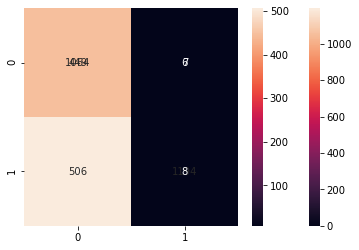

In [253]:
metric_train = evaluate(train_move, label_train_move)
metric_test = evaluate(test_move, label_test_move)

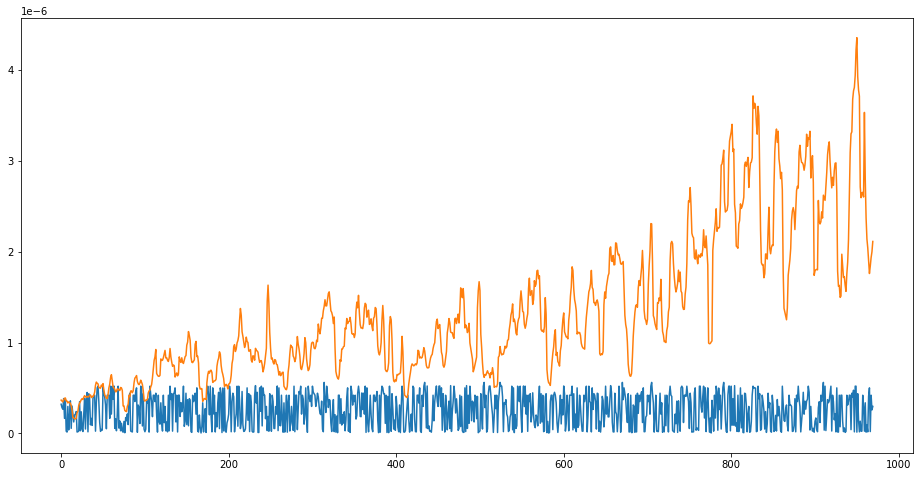

In [254]:
plt.figure(figsize=(16,8))
plt.plot(ypred)
plt.plot(label_test)

Gradient Boosting

In [255]:
gb = GradientBoostingRegressor()
GradientBoostingRegressor(ccp_alpha= 0, criterion='mse', max_depth=6) 

GradientBoostingRegressor(ccp_alpha=0, criterion='mse', max_depth=6)

In [256]:
gb.fit(train, label_train)

score = gb.score(train, label_train)
print("R-squared:", score) 

ypred = gb.predict(test)
mse = mean_squared_error(label_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

R-squared: 0.22907393455513214
MSE:  2.0723888106932444e-12
RMSE:  1.0361944053466222e-12


In [257]:
#Obtain new train movement label based on whether ypred close price at t > close price at t-1
ypred_train = gb.predict(train)
train_move = (ypred_train - train["Close (t-1)"])
train_move = train_move.where(train_move < 0, 1).where(train_move >= 0, 0).astype(int)
label_train_move = train_data["movement"]
test_move = (ypred - test["Close (t-1)"])
test_move = test_move.where(test_move < 0, 1).where(test_move >= 0, 0).astype(int)
label_test_move = test_data["movement"]

accuracy: 0.5132508833922261
precision: 0.5081247849160173
recall: 0.5132508833922261
f1 0.5055554313004681
metrics.roc_auc_score 0.5063025407410886
              precision    recall  f1-score   support

           0       0.48      0.38      0.42      1070
           1       0.53      0.63      0.58      1194

    accuracy                           0.51      2264
   macro avg       0.51      0.51      0.50      2264
weighted avg       0.51      0.51      0.51      2264

accuracy: 0.47010309278350515
precision: 0.22099691784461686
recall: 0.47010309278350515
f1 0.30065499342114776
metrics.roc_auc_score 0.5
              precision    recall  f1-score   support

           0       0.47      1.00      0.64       456
           1       0.00      0.00      0.00       514

    accuracy                           0.47       970
   macro avg       0.24      0.50      0.32       970
weighted avg       0.22      0.47      0.30       970



C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\metrics\_classifi

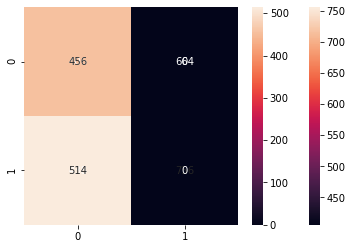

In [258]:
metric_train = evaluate(train_move, label_train_move)
metric_test = evaluate(test_move, label_test_move)

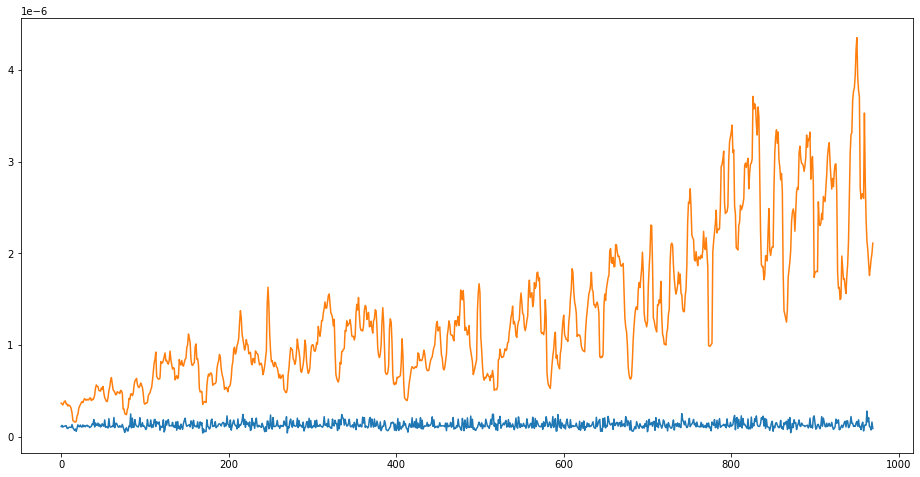

In [259]:
plt.figure(figsize=(16,8))
plt.plot(ypred)
plt.plot(label_test)

Random Forest

In [260]:
rfc = RandomForestRegressor()
RandomForestRegressor(ccp_alpha= 0, criterion='mse', max_depth=6) 

RandomForestRegressor(ccp_alpha=0, max_depth=6)

In [261]:
rfc.fit(train, label_train)

score = rfc.score(train, label_train)
print("R-squared:", score) 

ypred = rfc.predict(test)
mse = mean_squared_error(label_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

R-squared: 0.9358059763790945
MSE:  1.7511653238122107e-12
RMSE:  8.755826619061053e-13


In [262]:
#Obtain new train movement label based on whether ypred close price at t > close price at t-1
ypred_train = rfc.predict(train)
train_move = (ypred_train - train["Close (t-1)"])
train_move = train_move.where(train_move < 0, 1).where(train_move >= 0, 0).astype(int)
label_train_move = train_data["movement"]
test_move = (ypred - test["Close (t-1)"])
test_move = test_move.where(test_move < 0, 1).where(test_move >= 0, 0).astype(int)
label_test_move = test_data["movement"]

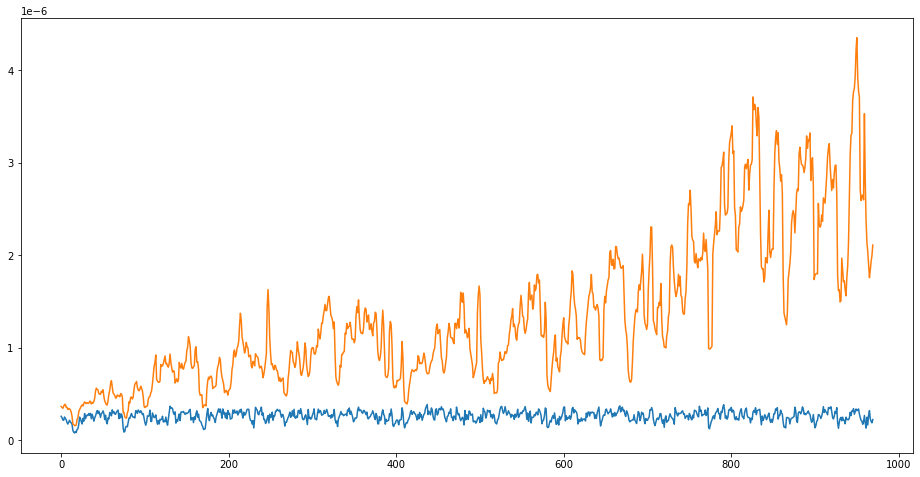

In [264]:
plt.figure(figsize=(16,8))
plt.plot(ypred)
plt.plot(label_test)

In [265]:
p = pd.concat([pd.DataFrame(ypred_train), train["Close (t-1)"], train_move], axis = 1)
p.columns = ["close (t)", "close(t-1)", "movement"]
p

,close (t),close(t-1),movement
0,2.503808e-08,5.750495e-09,1
1,1.903892e-08,4.970729e-09,1
2,1.595141e-08,3.731747e-09,1
3,1.573387e-08,3.433275e-09,1
4,4.861076e-08,2.991173e-09,1
...,...,...,...
2259,3.282188e-07,4.127098e-07,0
2260,4.918811e-07,5.689806e-07,0
2261,4.497033e-07,5.310644e-07,0
2262,3.610196e-07,4.341631e-07,0


In [266]:
a = pd.concat([label_train, train["Close (t-1)"], train_data["movement"]], axis = 1)
a.columns = ["close (t)", "close(t-1)", "movement"]
a

,close (t),close(t-1),movement
0,5.727278e-09,5.750495e-09,0
1,4.653396e-09,4.970729e-09,0
2,3.783835e-09,3.731747e-09,1
3,3.660741e-09,3.433275e-09,1
4,3.008507e-09,2.991173e-09,1
...,...,...,...
2259,4.175312e-07,4.127098e-07,1
2260,5.609861e-07,5.689806e-07,0
2261,5.193933e-07,5.310644e-07,0
2262,4.365384e-07,4.341631e-07,1


In [267]:
comb = p.merge(a, left_on = "close(t-1)", right_on = "close(t-1)")
len(comb[comb["movement_x"] == comb["movement_y"]])
len(a)

2264

accuracy: 0.5234098939929329
precision: 0.5201166475681589
recall: 0.5234098939929329
f1 0.5192436903569754
metrics.roc_auc_score 0.5181663770566226
              precision    recall  f1-score   support

           0       0.50      0.42      0.46      1070
           1       0.54      0.61      0.58      1194

    accuracy                           0.52      2264
   macro avg       0.52      0.52      0.52      2264
weighted avg       0.52      0.52      0.52      2264

accuracy: 0.47010309278350515
precision: 0.22099691784461686
recall: 0.47010309278350515
f1 0.30065499342114776
metrics.roc_auc_score 0.5


C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\metrics\_classifi

              precision    recall  f1-score   support

           0       0.47      1.00      0.64       456
           1       0.00      0.00      0.00       514

    accuracy                           0.47       970
   macro avg       0.24      0.50      0.32       970
weighted avg       0.22      0.47      0.30       970



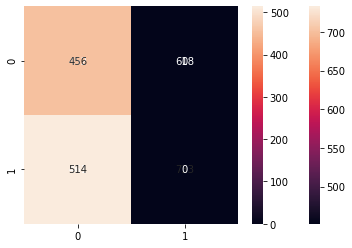

In [268]:
metric_train = evaluate(train_move, label_train_move)
metric_test = evaluate(test_move, label_test_move)